In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [175]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, Normalizer

from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import torch
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deep Learning/Customer Churn Prediction Model/telco-cutomer-churn.csv')

# EDA and Data Preprocessing

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()
# What a dataset it is

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in columns:
  df[col] = df[col].replace({'Yes': 1, 'No': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


# EDA on Gender Column

<Axes: xlabel='gender'>

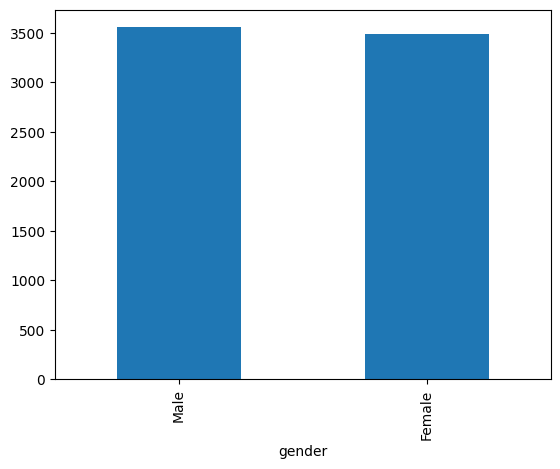

In [ ]:
df['gender'].value_counts().plot(kind='bar')

In [ ]:
print(df[df['gender'] == 'Male'].shape)
print(df[df['gender'] == 'Female'].shape)

(3555, 21)
(3488, 21)


<Axes: xlabel='gender', ylabel='Churn'>

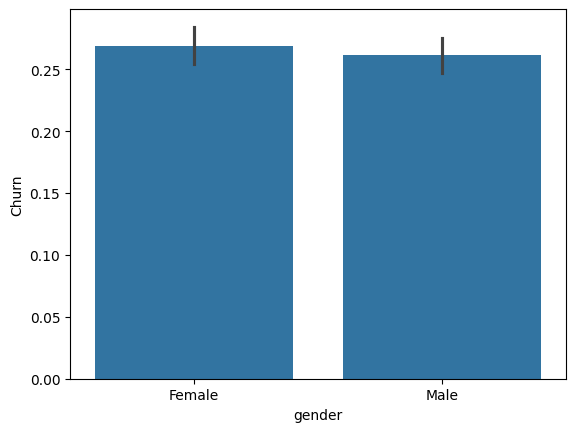

In [ ]:
sns.barplot(x=df['gender'], y=df['Churn'])

# EDA on Senior Citizen Column

<Axes: ylabel='count'>

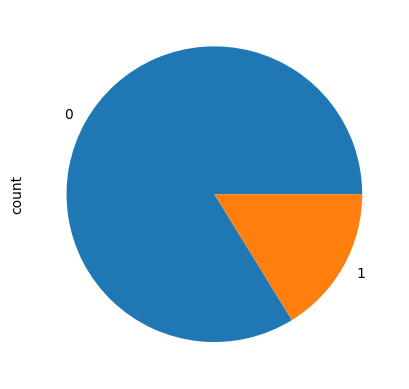

In [ ]:
df['SeniorCitizen'].value_counts().plot(kind='pie')

<Axes: xlabel='SeniorCitizen', ylabel='Churn'>

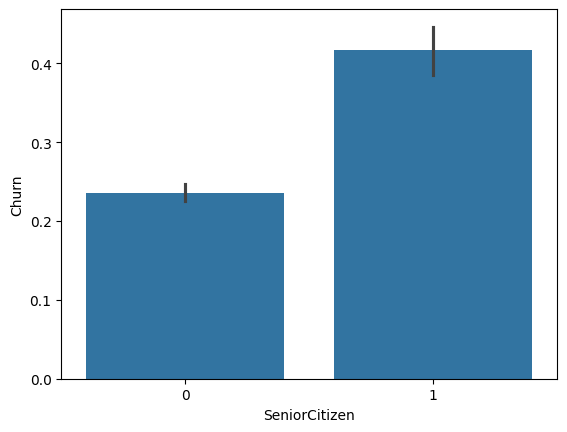

In [ ]:
sns.barplot(x=df['SeniorCitizen'], y=df['Churn'])

In [ ]:
df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1)].shape

(574, 21)

In [ ]:
df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1)].shape

(568, 21)

# EDA on Partner Column

<Axes: ylabel='count'>

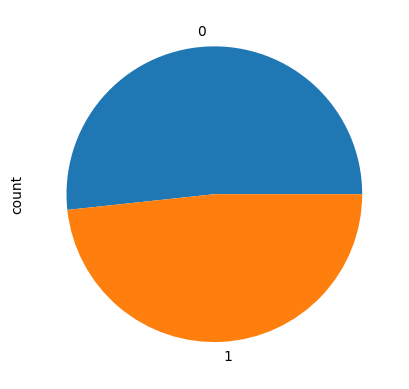

In [ ]:
df['Partner'].value_counts().plot(kind='pie')

<Axes: xlabel='Partner', ylabel='Churn'>

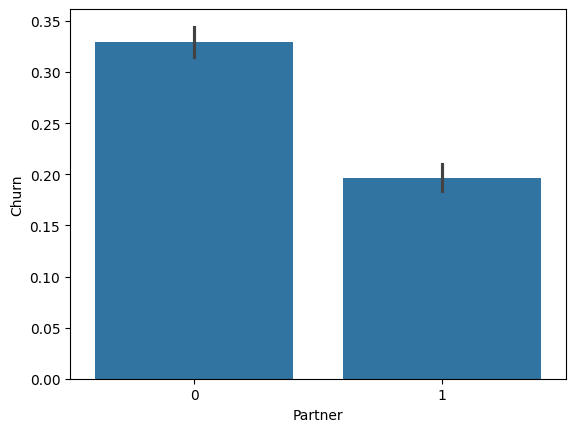

In [ ]:
sns.barplot(x=df['Partner'], y=df['Churn'])

<Axes: xlabel='Partner', ylabel='gender'>

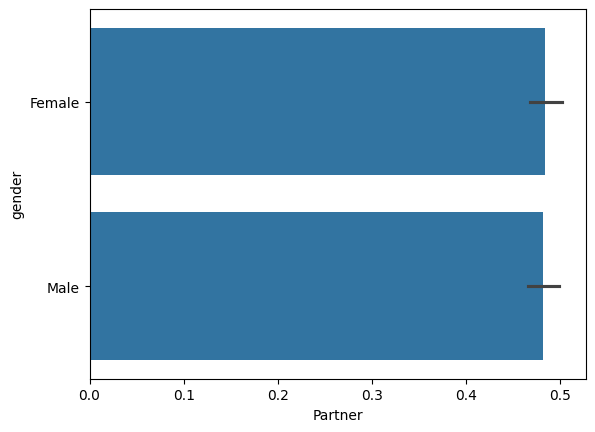

In [ ]:
sns.barplot(x=df['Partner'], y=df['gender'])

# EDA on Tenure

<Axes: ylabel='tenure'>

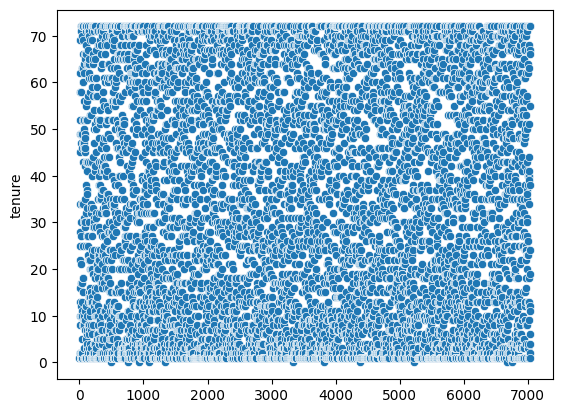

In [ ]:
sns.scatterplot(df['tenure'])

<Axes: ylabel='tenure'>

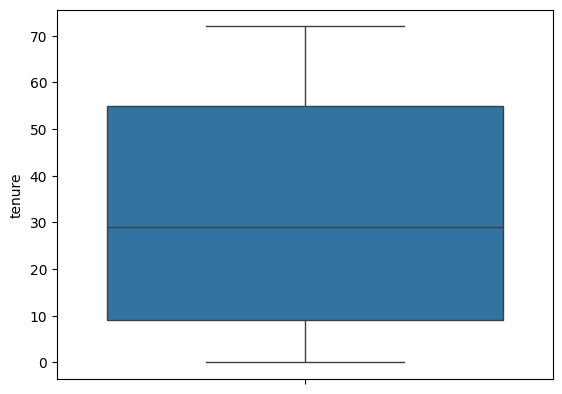

In [ ]:
sns.boxplot(df['tenure'])

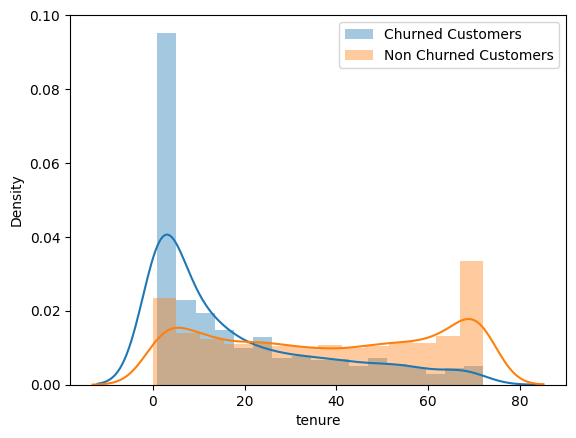

In [ ]:
sns.distplot(df[df['Churn'] == 1]['tenure'], label='Churned Customers')
sns.distplot(df[df['Churn'] == 0]['tenure'], label='Non Churned Customers')
plt.legend()
plt.show()

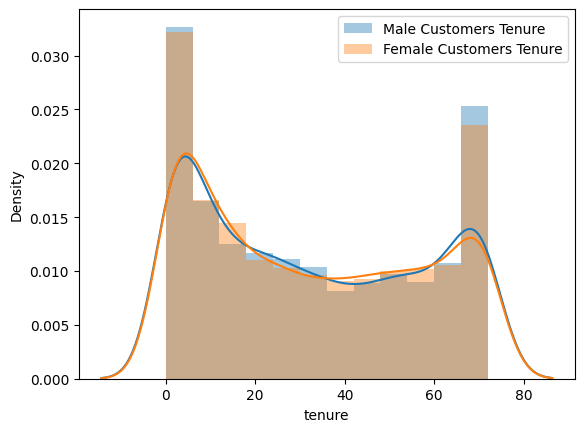

In [ ]:
sns.distplot(df[df['gender'] == 'Male']['tenure'], label='Male Customers Tenure')
sns.distplot(df[df['gender'] == 'Female']['tenure'], label='Female Customers Tenure')
plt.legend()
plt.show()

In [ ]:
df[df['tenure'] == 1]['tenure']

0       1
20      1
22      1
27      1
33      1
       ..
6979    1
7010    1
7016    1
7018    1
7032    1
Name: tenure, Length: 613, dtype: int64

In [ ]:
# PhoneService      7043 non-null   object
# MultipleLines     7043 non-null   object
# InternetService   7043 non-null   object
# OnlineSecurity    7043 non-null   object
# OnlineBackup      7043 non-null   object
# DeviceProtection  7043 non-null   object
# TechSupport       7043 non-null   object
# StreamingTV       7043 non-null   object
# StreamingMovies   7043 non-null   object

# We will look upon these columns later, because all these columns are related to the services that a customer has taken, and we will analyze them later.

# EDA on Contract

<Axes: xlabel='Contract'>

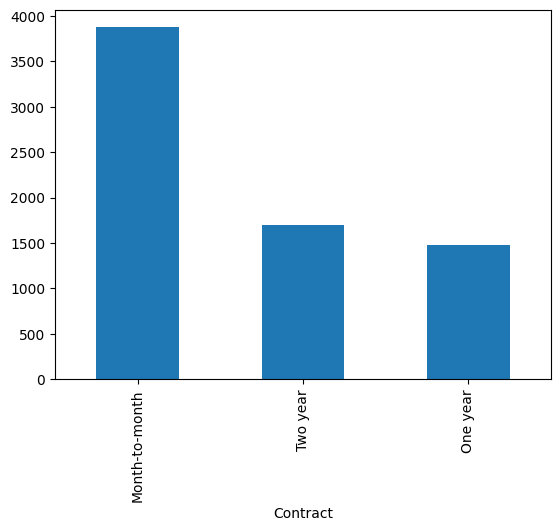

In [ ]:
df['Contract'].value_counts().plot(kind='bar')

<Axes: xlabel='Contract', ylabel='Churn'>

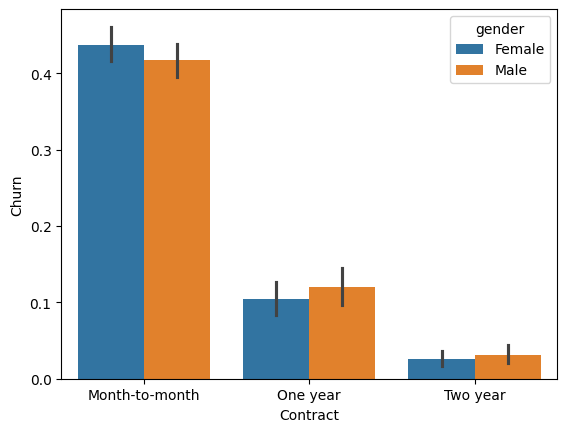

In [ ]:
sns.barplot(x=df['Contract'], y=df['Churn'], hue=df['gender'])

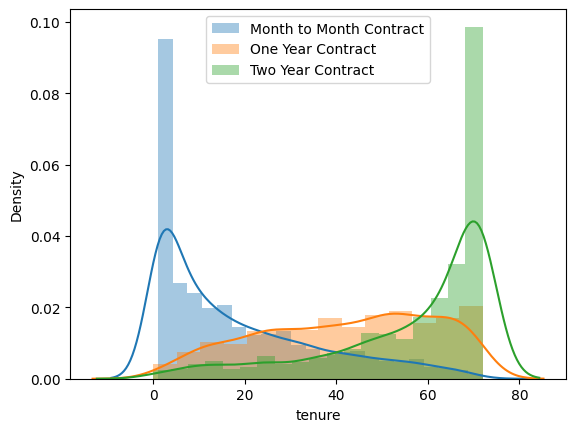

In [ ]:
sns.distplot(df[df['Contract'] == 'Month-to-month']['tenure'], label='Month to Month Contract')
sns.distplot(df[df['Contract'] == 'One year']['tenure'], label='One Year Contract')
sns.distplot(df[df['Contract'] == 'Two year']['tenure'], label='Two Year Contract')
plt.legend()
plt.show()
# The Graph is as expected

In [ ]:
df[df['Contract'] == 'Two year']['tenure'].mean()

56.73510324483776

# EDA on Payment Method

<Axes: xlabel='PaymentMethod'>

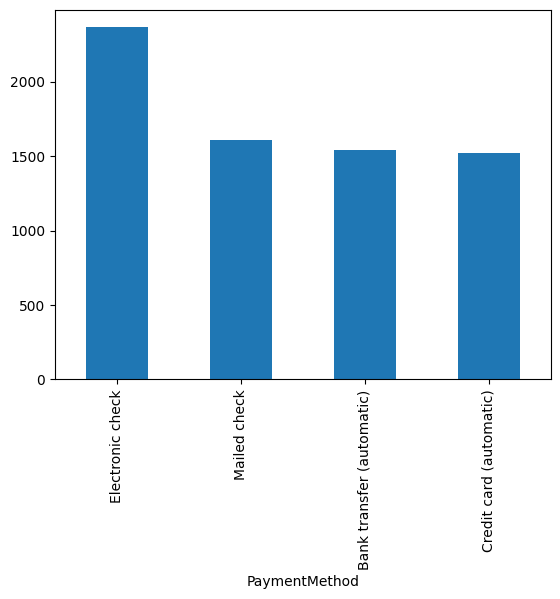

In [ ]:
df['PaymentMethod'].value_counts().plot(kind='bar')

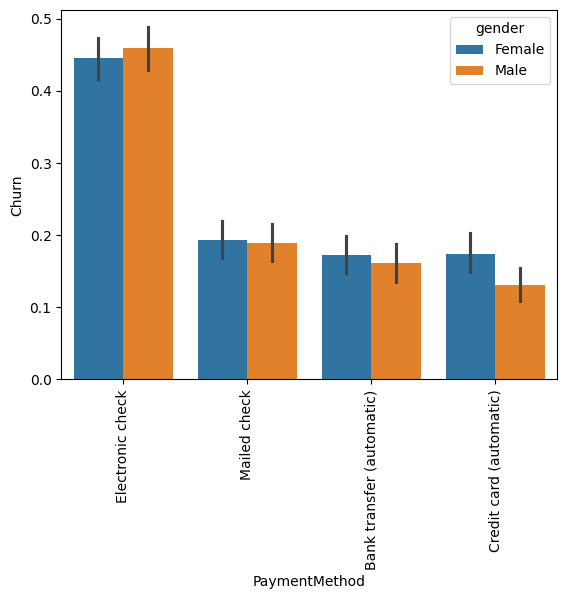

In [ ]:
sns.barplot(x=df['PaymentMethod'], y=df['Churn'], hue=df['gender'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

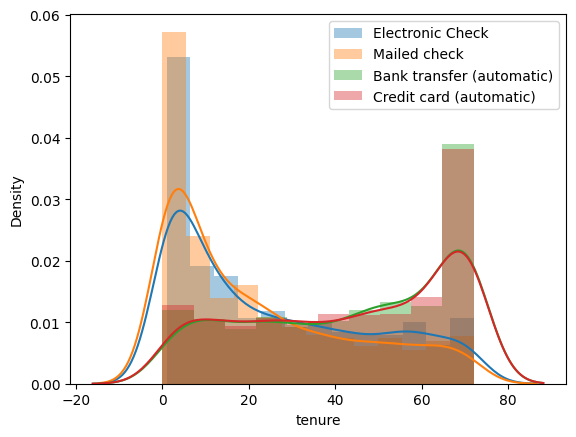

In [ ]:
sns.distplot(df[df['PaymentMethod'] == 'Electronic check']['tenure'], label='Electronic Check')
sns.distplot(df[df['PaymentMethod'] == 'Mailed check']['tenure'], label='Mailed check')
sns.distplot(df[df['PaymentMethod'] == 'Bank transfer (automatic)']['tenure'], label='Bank transfer (automatic)')
sns.distplot(df[df['PaymentMethod'] == 'Credit card (automatic)']['tenure'], label='Credit card (automatic)')
plt.legend()
plt.show()

# EDA on MonthlyCharges

<Axes: ylabel='MonthlyCharges'>

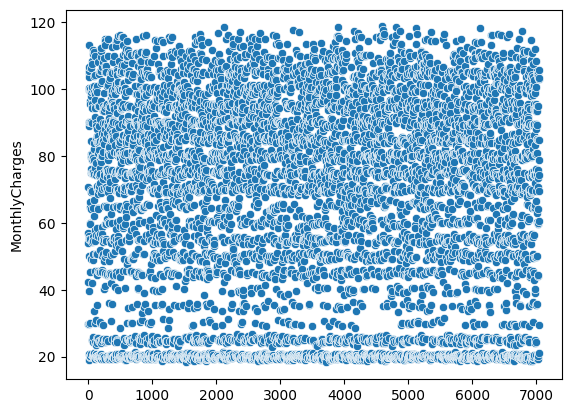

In [ ]:
sns.scatterplot(df['MonthlyCharges'])

<Axes: ylabel='MonthlyCharges'>

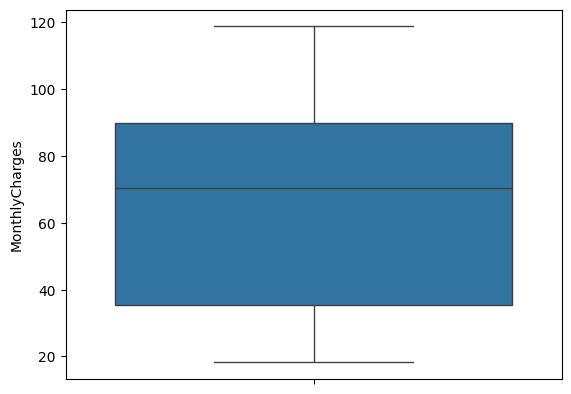

In [ ]:
sns.boxplot(df['MonthlyCharges'])

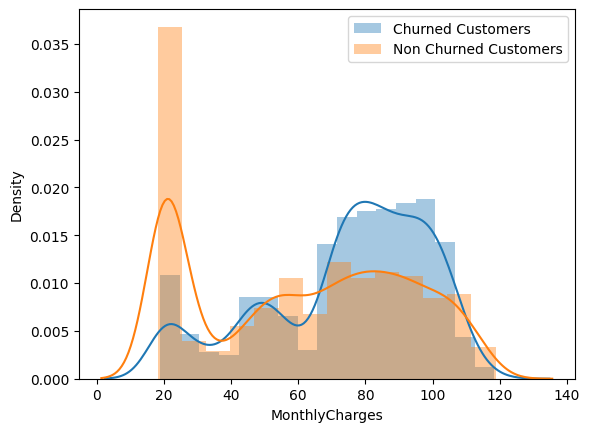

In [ ]:
sns.distplot(df[df['Churn'] == 1]['MonthlyCharges'], label='Churned Customers')
sns.distplot(df[df['Churn'] == 0]['MonthlyCharges'], label='Non Churned Customers')
plt.legend()
plt.show()

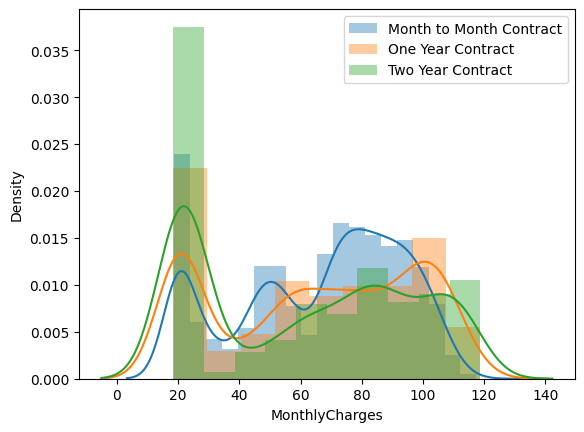

In [ ]:
sns.distplot(df[df['Contract'] == 'Month-to-month']['MonthlyCharges'], label='Month to Month Contract')
sns.distplot(df[df['Contract'] == 'One year']['MonthlyCharges'], label='One Year Contract')
sns.distplot(df[df['Contract'] == 'Two year']['MonthlyCharges'], label='Two Year Contract')
plt.legend()
plt.show()

# EDA on Total Charges

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype('float64')

<Axes: ylabel='TotalCharges'>

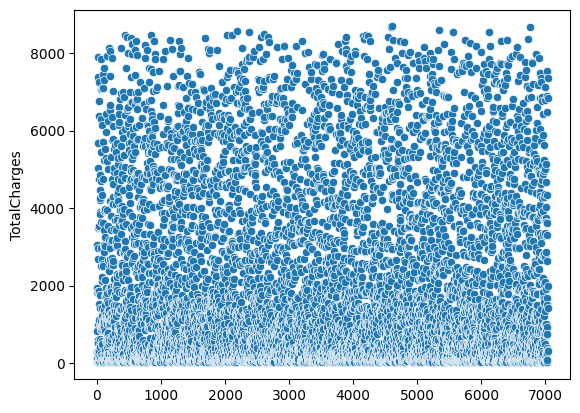

In [ ]:
sns.scatterplot(df['TotalCharges'])

<Axes: ylabel='TotalCharges'>

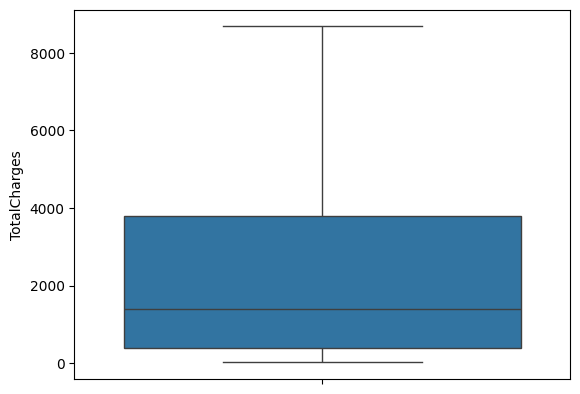

In [ ]:
sns.boxplot(df['TotalCharges'])

<Axes: xlabel='TotalCharges', ylabel='Density'>

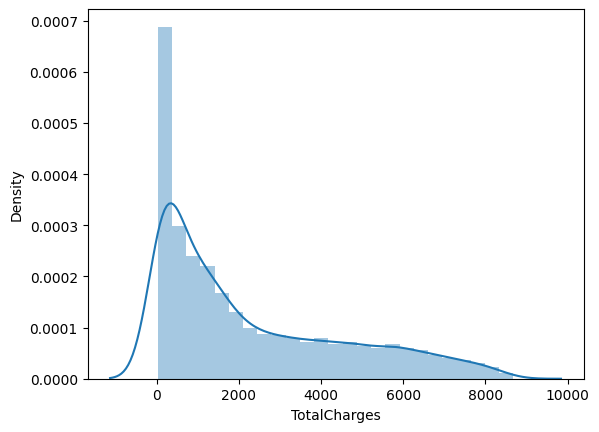

In [ ]:
sns.distplot(df['TotalCharges'])

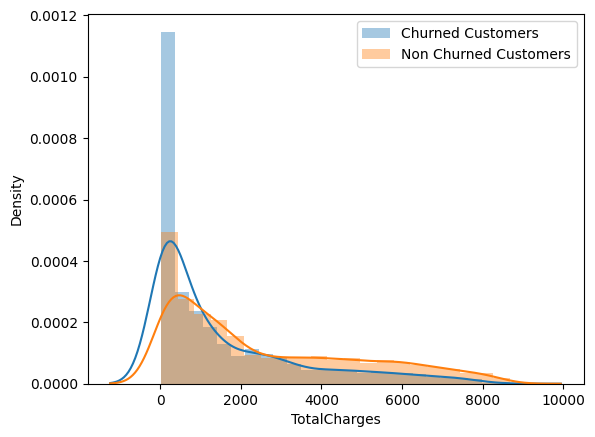

In [ ]:
sns.distplot(df[df['Churn'] == 1]['TotalCharges'], label='Churned Customers')
sns.distplot(df[df['Churn'] == 0]['TotalCharges'], label='Non Churned Customers')
plt.legend()
plt.show()

# Analysing the Extra Services

In [ ]:
df['MultipleLines'].value_counts()

MultipleLines
0                   3390
1                   2971
No phone service     682
Name: count, dtype: int64

In [ ]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [ ]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
0                      3498
1                      2019
No internet service    1526
Name: count, dtype: int64

In [ ]:
df['OnlineBackup'].value_counts()

OnlineBackup
0                      3088
1                      2429
No internet service    1526
Name: count, dtype: int64

In [ ]:
df['DeviceProtection'].value_counts()

DeviceProtection
0                      3095
1                      2422
No internet service    1526
Name: count, dtype: int64

In [ ]:
df['TechSupport'].value_counts()

TechSupport
0                      3473
1                      2044
No internet service    1526
Name: count, dtype: int64

In [ ]:
df['StreamingTV'].value_counts()

StreamingTV
0                      2810
1                      2707
No internet service    1526
Name: count, dtype: int64

In [ ]:
df['StreamingMovies'].value_counts()

StreamingMovies
0                      2785
1                      2732
No internet service    1526
Name: count, dtype: int64

In [ ]:
columns = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity']

for col in columns:
  df[col] = df[col].replace('No internet service', 0)
  df[col] = df[col].astype('int64')

In [ ]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0)
df['MultipleLines'] = df['MultipleLines'].astype('int64')

In [ ]:
df['StreamingMovies']

0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    1
Name: StreamingMovies, Length: 7043, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


<Axes: xlabel='InternetService', ylabel='Churn'>

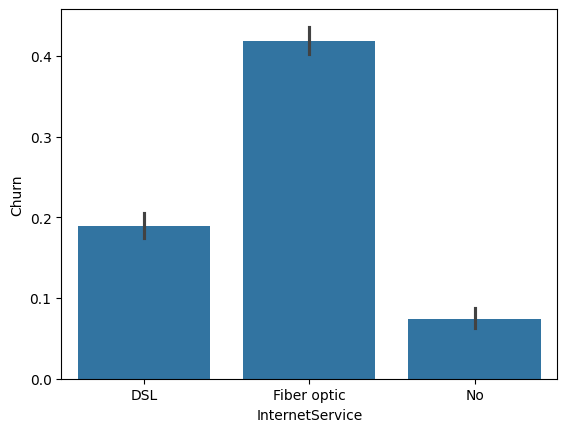

In [ ]:
sns.barplot(x=df['InternetService'], y=df['Churn'])

# Correlation of Numerical Columns

<Axes: >

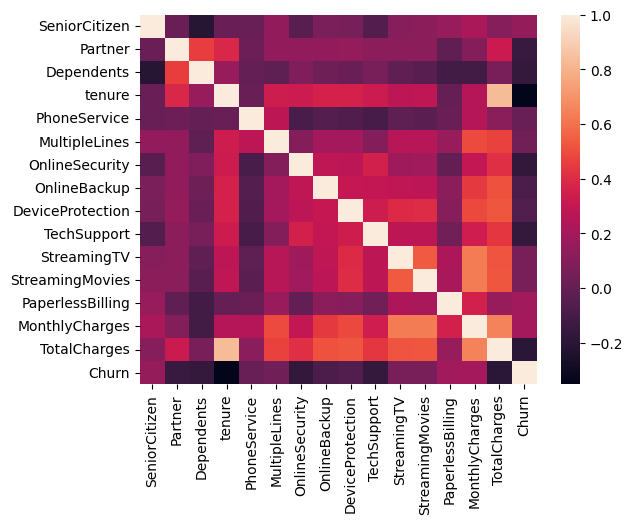

In [ ]:
numerical_columns = df.select_dtypes(include='number').columns
sns.heatmap(df[numerical_columns].corr())

In [ ]:
df[numerical_columns].corr()['Churn']

SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.040102
OnlineSecurity     -0.171226
OnlineBackup       -0.082255
DeviceProtection   -0.066160
TechSupport        -0.164674
StreamingTV         0.063228
StreamingMovies     0.061382
PaperlessBilling    0.191825
MonthlyCharges      0.193356
TotalCharges       -0.199484
Churn               1.000000
Name: Churn, dtype: float64

In [ ]:
df.drop(columns=['customerID', 'Dependents', 'StreamingTV', 'StreamingMovies'], inplace=True)

In [ ]:
df.shape

(7043, 17)

# Feature Engineering

In [ ]:
cat_columns_ohe = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
num_column_normalized = ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('normalized', Normalizer())
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_columns_ohe),
        ('num', numerical_transformer, num_column_normalized)
    ])

In [ ]:
transformed_data = preprocessor.fit_transform(df)

# Optional: Get feature names after one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat']['onehot']
feature_names = cat_encoder.get_feature_names_out(input_features=cat_columns_ohe)

In [ ]:
print("Length of feature_names:", len(feature_names))
print("Length of num_column_normalized:", len(num_column_normalized))
print("Shape of transformed_data:", transformed_data.shape)

Length of feature_names: 8
Length of num_column_normalized: 3
Shape of transformed_data: (7043, 11)


In [ ]:
num_column_normalized

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
all_column_names = feature_names.tolist() + num_column_normalized
transformed_df = pd.DataFrame(transformed_data, columns=all_column_names)

In [ ]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender_Male                            7043 non-null   float64
 1   InternetService_Fiber optic            7043 non-null   float64
 2   InternetService_No                     7043 non-null   float64
 3   Contract_One year                      7043 non-null   float64
 4   Contract_Two year                      7043 non-null   float64
 5   PaymentMethod_Credit card (automatic)  7043 non-null   float64
 6   PaymentMethod_Electronic check         7043 non-null   float64
 7   PaymentMethod_Mailed check             7043 non-null   float64
 8   tenure                                 7043 non-null   float64
 9   MonthlyCharges                         7043 non-null   float64
 10  TotalCharges                           7043 non-null   float64
dtypes: f

In [ ]:
df.drop(columns=['gender', 'tenure', 'InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges',	'TotalCharges'], inplace=True)

In [ ]:
final_df = pd.concat([transformed_df, df], axis=1)

In [ ]:
final_df['gender_Male'] = final_df['gender_Male'].astype('int64')
final_df['InternetService_Fiber optic'] = final_df['InternetService_Fiber optic'].astype('int64')
final_df['InternetService_No'] = final_df['InternetService_No'].astype('int64')
final_df['Contract_One year'] = final_df['Contract_One year'].astype('int64')
final_df['Contract_Two year'] = final_df['Contract_Two year'].astype('int64')
final_df['PaymentMethod_Credit card (automatic)'] = final_df['PaymentMethod_Credit card (automatic)'].astype('int64')
final_df['PaymentMethod_Electronic check'] = final_df['PaymentMethod_Electronic check'].astype('int64')
final_df['PaymentMethod_Mailed check'] = final_df['PaymentMethod_Mailed check'].astype('int64')

#gender_Male	InternetService_Fiber optic	InternetService_No	Contract_One year	Contract_Two year	PaymentMethod_Credit card (automatic)	PaymentMethod_Electronic check	PaymentMethod_Mailed check

In [ ]:
final_df

,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,...,SeniorCitizen,Partner,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,Churn
0,0,0,0,0,0,0,1,0,0.023682,0.706908,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,1,0,0,0,1,0.017983,0.030122,...,0,0,1,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0.016552,0.445662,...,0,0,1,0,1,1,0,0,1,1
3,1,0,0,1,0,0,0,0,0.024433,0.022967,...,0,0,0,0,1,0,1,1,0,0
4,0,1,0,0,0,0,1,0,0.011952,0.422512,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,0,0,0,1,0.012045,0.042561,...,0,1,1,1,1,0,1,1,1,0
7039,0,1,0,1,0,1,0,0,0.009777,0.014014,...,0,1,1,1,0,1,1,0,1,0
7040,0,0,0,0,0,0,1,0,0.031620,0.085085,...,0,1,0,0,1,0,0,0,1,0
7041,1,1,0,0,0,0,0,1,0.012677,0.235799,...,1,1,1,1,0,0,0,0,1,1


# Splitting the Dataset

In [ ]:
y = final_df['Churn']
x = final_df.drop(columns=['Churn'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [ ]:
X_train.shape, y_train.shape

((6338, 20), (6338,))

In [ ]:
X_test.shape, y_test.shape

((705, 20), (705,))

# Creating and Training our Model

In [ ]:
model = Sequential()

model.add(Dense(units=256, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=16, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               5376      
                                                                 
 batch_normalization_38 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_39 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_20 (Dropout)        (None, 256)              

In [ ]:
optimizers = Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=250, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
26/26 [==============================] - 8s 37ms/step - loss: 0.9141 - accuracy: 0.4956 - val_loss: 0.6845 - val_accuracy: 0.5943
Epoch 2/100
26/26 [==============================] - 1s 21ms/step - loss: 0.7983 - accuracy: 0.5434 - val_loss: 0.6594 - val_accuracy: 0.7121
Epoch 3/100
26/26 [==============================] - 0s 18ms/step - loss: 0.7319 - accuracy: 0.5813 - val_loss: 0.6417 - val_accuracy: 0.7702
Epoch 4/100
26/26 [==============================] - 0s 17ms/step - loss: 0.7070 - accuracy: 0.5951 - val_loss: 0.6258 - val_accuracy: 0.7801
Epoch 5/100
26/26 [==============================] - 0s 18ms/step - loss: 0.6791 - accuracy: 0.6188 - val_loss: 0.6133 - val_accuracy: 0.7872
Epoch 6/100
26/26 [==============================] - 0s 17ms/step - loss: 0.6426 - accuracy: 0.6583 - val_loss: 0.5957 - val_accuracy: 0.7759
Epoch 7/100
26/26 [==============================] - 0s 18ms/step - loss: 0.6186 - accuracy: 0.6756 - val_loss: 0.5718 - val_accuracy: 0.7915
Epoch 

# Evaluating the Model

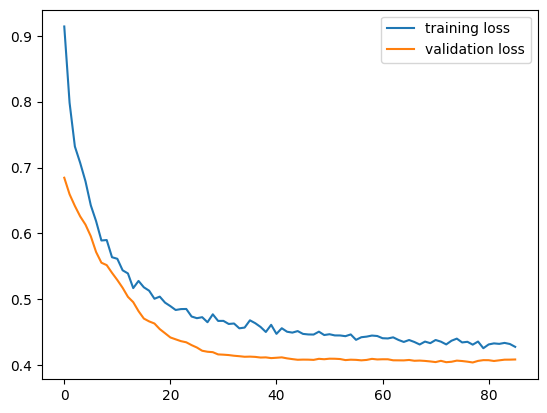

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

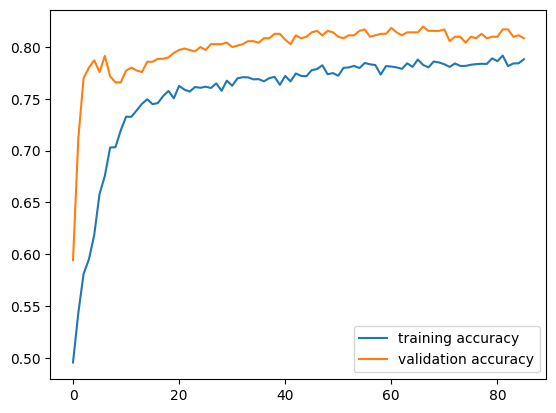

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

199/199 [==============================] - 2s 9ms/step


In [ ]:
y_output_test = []

for i in y_pred_test:
  if i > 0.5:
    y_output_test.append(1)
  else:
    y_output_test.append(0)

y_output_train = []

for i in y_pred_train:
  if i > 0.5:
    y_output_train.append(1)
  else:
    y_output_train.append(0)

In [ ]:
print('The Accuracy Score of Test Dataset is', accuracy_score(y_test, y_output_test))
print('\n')

print('The Classification Report of Test Dataset is ')
print(classification_report(y_test, y_output_test))
print('\n')

print('The Confusion Matrix of Test Dataset is ')
print(confusion_matrix(y_test, y_output_test))

print('\n')

print('The Accuracy Score of Train Dataset is', accuracy_score(y_train, y_output_train))
print('\n')

print('The Classification Report of Train Dataset is')
print(classification_report(y_train, y_output_train))
print('\n')

print('The Confusion Matrix of Train Dataset is ')
print(confusion_matrix(y_train, y_output_train))

# In our problem we have to understood that the precision score is important, we need a model, whose precison (Type 1) error is less.

The Accuracy Score of Test Dataset is 0.8127659574468085


The Classification Report of Test Dataset is 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       541
           1       0.60      0.59      0.60       164

    accuracy                           0.81       705
   macro avg       0.74      0.74      0.74       705
weighted avg       0.81      0.81      0.81       705



The Confusion Matrix of Test Dataset is 
[[476  65]
 [ 67  97]]


The Accuracy Score of Train Dataset is 0.8007257810034711


The Classification Report of Train Dataset is
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4633
           1       0.63      0.62      0.63      1705

    accuracy                           0.80      6338
   macro avg       0.75      0.74      0.75      6338
weighted avg       0.80      0.80      0.80      6338



The Confusion Matrix of Train Dataset is 
[[4014  619]
 [ 644 106

In [174]:
# So, let's export the model first.
torch.save(model, '/content/drive/My Drive/Colab Notebooks/Deep Learning/Customer Churn Prediction Model/model.h5')